In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [41]:
iris = load_iris()

In [42]:
df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
    )

In [43]:
df['target'] = iris.target

In [44]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df = df[df['target']!=0][['sepal width (cm)','petal length (cm)','target']]

In [46]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

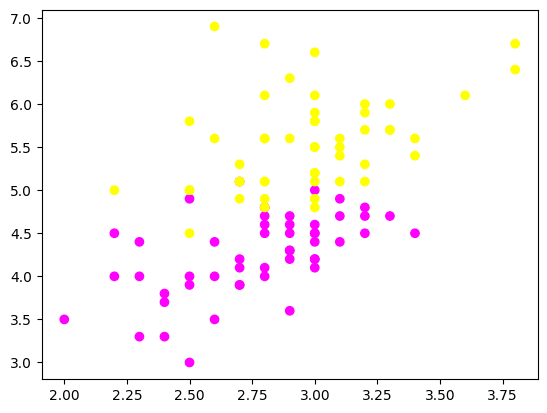

In [48]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'],cmap='spring')

In [49]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [50]:
df_val

,sepal width (cm),petal length (cm),target
52,3.1,4.9,1
72,2.5,4.9,1
147,3.0,5.2,2
62,2.2,4.0,1
59,2.7,3.9,1


In [51]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [52]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
139,3.1,5.4,2
90,2.6,4.4,1
112,3.0,5.5,2
112,3.0,5.5,2
73,2.8,4.7,1
64,2.9,3.6,1
81,2.4,3.7,1
90,2.6,4.4,1


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [54]:
dt_bag1 = DecisionTreeClassifier()

In [55]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [56]:
evaluate(dt_bag1,X,y)

1.0


c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
112,3.0,5.5,2
103,2.9,5.6,2
90,2.6,4.4,1
103,2.9,5.6,2
73,2.8,4.7,1
112,3.0,5.5,2
103,2.9,5.6,2
112,3.0,5.5,2


In [58]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

0.8


c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
80,2.4,3.8,1
146,2.5,5.0,2
146,2.5,5.0,2
112,3.0,5.5,2
80,2.4,3.8,1
146,2.5,5.0,2
81,2.4,3.7,1
103,2.9,5.6,2


In [60]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

0.4


c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
df_test

,sepal width (cm),petal length (cm),target
134,2.6,5.6,2
110,3.2,5.1,2
104,3.0,5.8,2
92,2.6,4.0,1
145,3.0,5.2,2


In [64]:
print("Predictor 1",dt_bag1.predict(np.array([2.6,4.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.6,4.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.6,4.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
